In [1]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [2]:
!pip install matplotlib

In [3]:
!pip install plotly

In [4]:
!pip install sklearn

In [5]:
!pip install scipy

In [6]:
import sys
import scipy
import pandas as pd
import numpy as np
url="http://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
df=pd.read_csv(url,names=names)
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


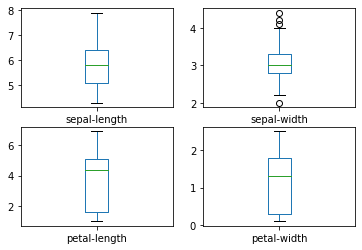

In [8]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False)
plt.show()

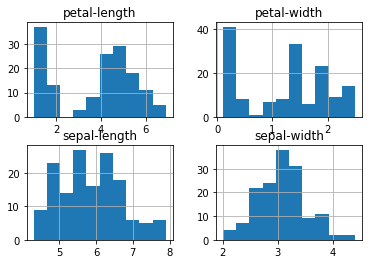

In [9]:
df.hist()
plt.show()

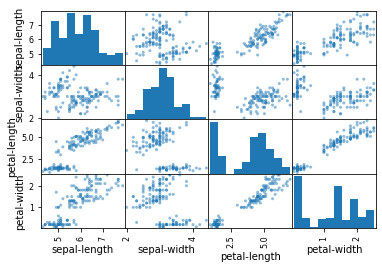

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [11]:
#split out validation dataset
import sklearn
from sklearn import model_selection

#import sklearn
array=df.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=7 #random state =7
from sklearn .preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
Y=label.fit_transform(Y)
Y
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [12]:
import plotly as ply
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [13]:
#trace1
iris_setosa=df.loc[(df['class']=="Iris-setosa"),:]
iris_virginica=df.loc[(df['class']=="Iris-virginica"),:]
iris_versicolor=df.loc[(df['class']=="Iris-versicolor"),:]
trace1=go.Scatter3d(
    x=iris_setosa['sepal-length'],
    y=iris_setosa['sepal-width'],
    z=iris_setosa['petal-length'],
    mode='markers',
    name="iris_setosa",
    marker=dict(
        color='#FF4500',
        size=12,
        line=dict(
            color='#FFFFFF',
            width=0.5
        )
    )
)

#trace2
trace2=go.Scatter3d(
    x=iris_virginica['sepal-length'],
    y=iris_virginica['sepal-width'],
    z=iris_virginica['petal-length'],
    mode='markers',
    name="iris_virginica",
    marker=dict(
        color='#FF00FF',
        size=12,
        line=dict(
            color='#FFFFFF',
            width=0.1
        )
    )
)

trace3=go.Scatter3d(
    x=iris_versicolor['sepal-length'],
    y=iris_versicolor['sepal-width'],
    z=iris_versicolor['petal-length'],
    mode='markers',
    name="iris_versicolor",
    marker=dict(
        color='#32CD32',
        size=12,
        line=dict(
            color='#FFFFFF',
            width=0.1
        )
    )
)
data=[trace1,trace2,trace3]
layout=go.Layout(
    title='3D iris_setosa and iris_verginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig=go.Figure(data=data, layout=layout)
iplot(fig)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_validation=sc.transform(X_validation)

In [15]:
#fitting K-NN 
from sklearn.neighbors import KNeighborsClassifier as K
classifier=K(n_neighbors=8,metric='minkowski')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [16]:

y_pred=classifier.predict(X_validation)
y_pred

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [17]:
classifier.score(X_validation,Y_validation)

0.9333333333333333

In [18]:
classifier.score(X_train,Y_train)

0.9833333333333333

In [19]:
X=df.iloc[:,[0,1,2,3]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
def gg(i):
    i = str(i)
    if i == "Iris-setosa":
        return int(0)
    elif i == 'Iris-virginica':
        return int(2)
    elif i == 'Iris-versicolor':
        return int(1)
df["class"] = df["class"].apply(gg)
df["class"].unique()

array([0, 1, 2], dtype=int64)

In [22]:

Y=df.iloc[:,[4]].values
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [23]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=11)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier as K
classifier=K(n_neighbors=8,metric='minkowski')
classifier.fit(X_train,Y_train)

<ipython-input-25-ad39c9b5acea>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(n_neighbors=8)

In [26]:
yp=classifier.predict(X_test)
yp

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1], dtype=int64)

In [27]:
X_test

array([[ 1.39465675, -0.05135273,  1.0443017 ,  1.21649492],
       [ 1.25425507, -0.05135273,  0.86001316,  1.49722452],
       [ 0.69264832, -0.49151894,  0.79858365,  0.37430613],
       [ 0.69264832,  0.6088966 ,  0.55286561,  0.51467093],
       [ 0.83305001, -0.71160205,  0.92144268,  0.93576532],
       [-1.27297529,  0.16873038, -1.41287877, -1.59080105],
       [ 1.25425507,  0.16873038,  0.36857707,  0.23394133],
       [-0.1497618 ,  3.0298108 , -1.41287877, -1.16970666],
       [-1.41337698,  0.16873038, -1.35144926, -1.45043625],
       [ 0.41184495, -0.27143583,  0.55286561,  0.23394133],
       [ 0.27144326, -1.8120176 ,  0.73715414,  0.37430613],
       [ 0.27144326, -1.8120176 ,  0.12285902, -0.32751786],
       [-0.57096686, -0.05135273,  0.43000658,  0.37430613],
       [-0.1497618 , -1.15176827,  0.73715414,  1.07613012],
       [ 1.53505844,  0.16873038,  0.98287219,  1.21649492],
       [-1.83458204, -1.59193449, -1.53573779, -1.31007145],
       [ 0.69264832, -0.

In [28]:
yp=classifier.predict([[1.2,4,2,1]])
yp

array([2], dtype=int64)

In [29]:
accuracy = classifier.score(X_test,Y_test)
print("accuracy is ",accuracy*100)

accuracy is  93.33333333333333


enter sepal-length : 3
enter sepal-width : 1 
enter petal-length : 5
enter petal-width : 3
verginica


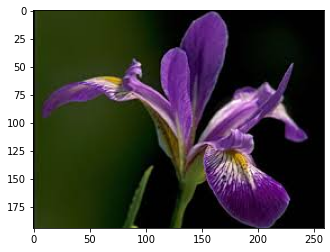

In [30]:
import os
import sys
from PIL import Image
import matplotlib.pyplot as plt
s=float(input("enter sepal-length : "))
s2=float(input("enter sepal-width : "))
p = float(input("enter petal-length : "))
p2 = float(input("enter petal-width : "))
y_pred=classifier.predict([[s,s2,p,p2]])
if y_pred == 1:
    print("setosa")
    img = Image.open("E:\\setosa.jpg")
    plt.imshow(img)
    plt.show()
        
elif y_pred == 2:
    print("verginica")
    img = Image.open("E:\\verginica.jpg")
    plt.imshow(img)
    plt.show()
elif y_pred == 0:
    print("versicolor")
    img = Image.open("E:\\versicolor.jpg")
    plt.imshow(img)
    plt.show()
    
else:
    print("don't know")